In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""
test=""
z_diff=""

In [2]:
shape_cat="mcal"
vol="vlim"
z_range="all_z"

In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /global/project/projectdirs/des/zhou/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /global/project/projectdirs/des/zhou/sa/lib/src/func.py  
%run -i /global/project/projectdirs/des/zhou/sa/lib/src/corr_func.py  

In [4]:
if test=="foreground":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])>=z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
    
elif test=="background":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])<=-z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
elif test=="":
    members=shapes
else:
    raise TypeError

In [5]:
if vol!="uber":
    members=shapes

In [6]:
if quantile!="":
    i=int(quantile)

In [7]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')
elif key=="mag":
    key=('All','All','BCG_ZLUM')

In [8]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [9]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [10]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [11]:
NBINS=10

In [12]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [13]:
len(shapes)

105029

In [14]:
len(members)

105029

In [15]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [16]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

4322it [03:21, 21.46it/s]
0it [00:00, ?it/s]

Number of empty sat catalogs is 0


4322it [02:53, 24.91it/s]

Number of empty sat catalogs is 0


In [17]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [18]:
# ng_list=np.load("/global/project/projectdirs/des/zhou/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/global/project/projectdirs/des/zhou/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [19]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

cov_rel=get_cov(ng_rel)

In [20]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [21]:
if key!="":
    np.savez("/global/project/projectdirs/des/zhou/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [22]:
# matplotlib.rcParams.update({'font.size': 11}) # before plotting coode
# plt.figure(figsize=(6.2,5))
# ...
# plt.tight_layout()
# plt.subplots_adjust(hspace=0,wspace=0) # if doing multiple panels/subplots
# plt.savefig('namee.pdf', bbox_inches='tight')

def plt_w_error(meanlogr,xi,varxi,title):
    matplotlib.rcParams.update({'font.size': 11}) 
    plt.figure(figsize=(6.2,5))
    plt.errorbar(np.exp(meanlogr),xi,yerr=varxi,fmt='o')
    plt.title(title)
    plt.xscale('log')
#     ax.set_ylim(-0.020,0.020)
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/global/project/projectdirs/des/zhou/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [23]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Redshift distribution

In [147]:
members[('All','Z')]

ID
3007825827    0.619567
3007931336    0.408113
3007938592    0.408113
3007938814    0.408113
3007938890    0.408113
                ...   
3159944414    0.385452
3159944537    0.385452
3159945177    0.385452
3159945721    0.385452
3159946033    0.385452
Name: (All, Z), Length: 105029, dtype: float32

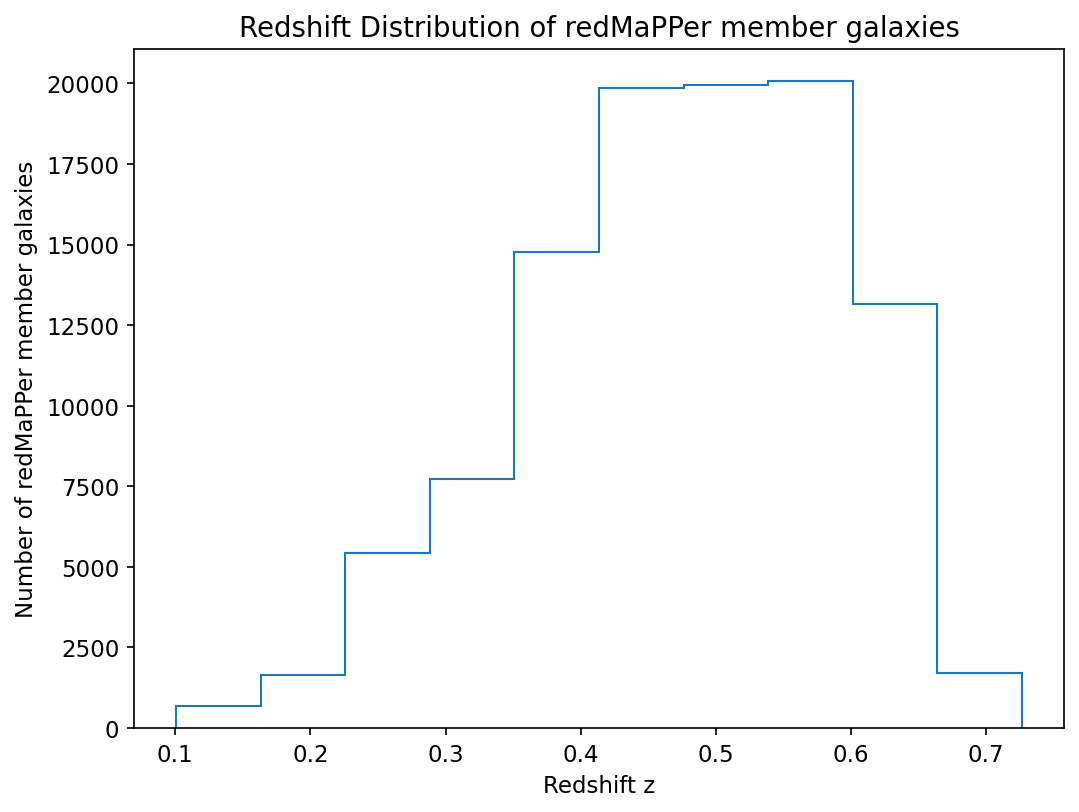

In [170]:
fig,ax=plt.subplots(figsize=(8,6),dpi=150)
ax.hist(members[('All','Z')],histtype='step')
ax.set_xlabel("Redshift z")
ax.set_ylabel("Number of redMaPPer member galaxies")
ax.set_title("Redshift Distribution of redMaPPer member galaxies")
plt.savefig("/global/project/projectdirs/des/zhou/sa/images/z_hist.pdf")

# Abs Plots

Aggregated xi:
[-32.123  -46.1376 -30.4757 -29.2178 -22.3512  11.1694  58.1169  54.2211
  12.7458   4.5475]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -3292.0816  -6271.9862  -8715.7173 -12389.0767 -17198.4768 -22259.7214
 -25051.9586 -22523.4493 -12767.2177  -1338.3202]
------------------------------------------------------------------------------
Aggregated npairs:
[  761.  1627.  2572.  4272.  7100. 11481. 17120. 22818. 24649.  8133.]
------------------------------------------------------------------------------
Mean xi:
[-0.0422 -0.0284 -0.0118 -0.0068 -0.0031  0.001   0.0034  0.0024  0.0005
  0.0006]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.326  -3.8549 -3.3887 -2.9001 -2.4223 -1.9388 -1.4633 -0.9871 -0.518
 -0.1646]
------------------------------------------------------------------------------


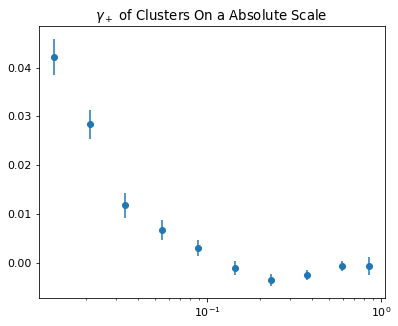

In [24]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

[ 8.0614e-03 -4.0169e-03  8.0985e-04 -8.0003e-04 -1.1234e-03 -1.6914e-05
  3.4635e-04 -8.3508e-05  1.5886e-04  6.9678e-05]
[-1.2262e-04  6.1101e-05 -1.2319e-05  1.2169e-05  1.7087e-05  2.5728e-07
 -5.2684e-06  1.2702e-06 -2.4164e-06 -1.0599e-06]


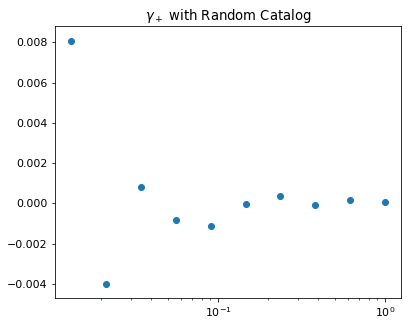

In [25]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

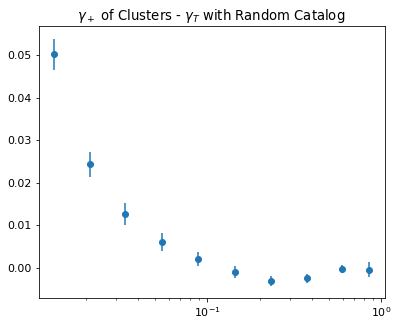

In [26]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

Aggregated xi:
[-21.1739 -41.1351 -39.9535 -24.3262 -43.191   12.3333  21.7691  46.7462
  25.1681  36.4253]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -1794.2648  -4367.6069  -7203.8497  -9568.6451 -13376.0262 -17685.9487
 -20861.6353 -20151.127  -13193.8657  -2000.5896]
------------------------------------------------------------------------------
Aggregated npairs:
[  417.  1132.  2123.  3292.  5506.  9063. 14135. 20072. 24791. 20118.]
------------------------------------------------------------------------------
Mean xi:
[-0.0508 -0.0363 -0.0188 -0.0074 -0.0078  0.0014  0.0015  0.0023  0.001
  0.0018]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3028 -3.8583 -3.3932 -2.9066 -2.4294 -1.9514 -1.4759 -1.0039 -0.5322
 -0.0994]
------------------------------------------------------------------------------


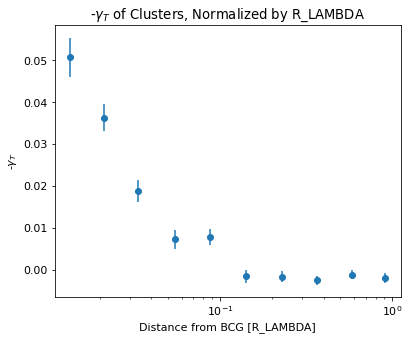

In [27]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"-$\gamma_T$ of Clusters, Normalized by R_LAMBDA")
plt.xlabel("Distance from BCG [R_LAMBDA]")
plt.ylabel(r"-$\gamma_T$")
plt.savefig("/global/project/projectdirs/des/zhou/sa/images/gamma_T_rel.pdf")
print_data(sum_rel,mean_rel)

In [28]:
print("Error bar size")
print(sig_rel)

Error bar size
[0.0047 0.0032 0.0026 0.0023 0.0019 0.0016 0.0013 0.0011 0.001  0.0011]


In [29]:
np.sqrt(np.dot(np.dot(mean_rel[0],np.linalg.inv(cov_rel)),mean_rel[0]))

18.079130895959732

In [30]:
len(cov_rel)

10

In [34]:
cov_rel

array([[ 2.1790e-05, -6.2833e-08,  2.9239e-07,  3.4022e-07, -1.1349e-07,
         1.4725e-07, -1.0124e-08,  7.8146e-08,  5.0958e-08,  5.8533e-08],
       [-6.2833e-08,  1.0375e-05,  1.6670e-07,  7.6514e-08,  8.0567e-08,
         1.6947e-08,  4.7715e-08,  5.9347e-08,  1.5666e-08, -7.9602e-08],
       [ 2.9239e-07,  1.6670e-07,  7.0001e-06,  5.1955e-08,  1.1944e-07,
        -8.5474e-08,  6.3328e-08,  5.1129e-08, -6.9425e-08,  6.8686e-09],
       [ 3.4022e-07,  7.6514e-08,  5.1955e-08,  5.1607e-06, -1.8085e-08,
        -3.6357e-08,  5.8089e-08,  3.4636e-08,  1.5998e-09,  5.4483e-09],
       [-1.1349e-07,  8.0567e-08,  1.1944e-07, -1.8085e-08,  3.6807e-06,
        -2.1827e-08, -1.9179e-08,  2.3699e-08, -4.4246e-08, -3.2119e-08],
       [ 1.4725e-07,  1.6947e-08, -8.5474e-08, -3.6357e-08, -2.1827e-08,
         2.4065e-06, -2.2190e-08,  1.9548e-10, -6.8319e-08,  4.8395e-08],
       [-1.0124e-08,  4.7715e-08,  6.3328e-08,  5.8089e-08, -1.9179e-08,
        -2.2190e-08,  1.6472e-06,  2.1654e-08

In [135]:
cov_rel.min()

-1.134898605624446e-07

In [136]:
cov_rel.max()

2.178958815711961e-05

In [97]:
ticks_val=np.exp(mean_rel[1])
ticks_string=["{:.2f}".format(val) for val in ticks_val]
print(ticks_string)

['0.01', '0.02', '0.03', '0.05', '0.09', '0.14', '0.23', '0.37', '0.59', '0.91']


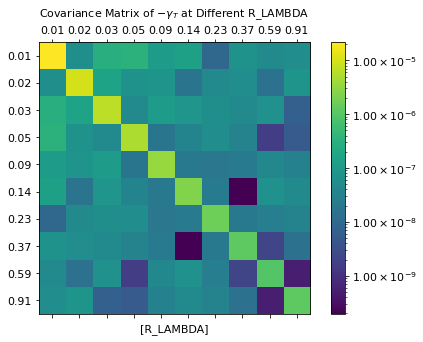

In [139]:
fig,ax=plt.subplots(figsize=(6.2,5))

from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
import matplotlib.colors as colors

plt.matshow(np.abs(cov_rel),fignum=0,norm=colors.LogNorm(vmin=np.abs(cov_rel).min(),vmax=np.abs(cov_rel).max()))

ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.00))

ax.set_xticks(range(len(ticks_val)))
ax.set_yticks(range(len(ticks_val)))

ax.set_xticklabels(ticks_val)


ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticks_string))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(ticks_string))

ax.set_xlabel("[R_LAMBDA]",labelpad=10)

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)


cb=plt.colorbar(pad=0.06,format=ticker.FuncFormatter(fmt))




ax.set_title('Covariance Matrix of $-\gamma_T$ at Different R_LAMBDA',fontsize=11,pad=12);
plt.savefig('/global/project/projectdirs/des/zhou/sa/images/cov.pdf')

In [54]:
print(f.number)

1


In [ ]:
np.dot(mean_rel[0],np.linalg.inv(cov_rel))

In [ ]:
mean_rel[0]

In [ ]:
cov_rel

In [ ]:
np.linalg.inv(cov_rel)